In [1]:
%load_ext autoreload
%autoreload 2

IDEAS:
- Clase pytorch fiuba https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/aprendizaje_profundo/blob/master/clase_3/jupyter_notebooks/Clase3_Pytorch.ipynb 
- https://theaisummer.com/learn-pytorch/ 

# Clase Tutorial 8: Introducción a PyTorch

TODO: Intro de que es y para que usamos pytorch https://anderfernandez.com/blog/tutorial-de-pytorch-2/

Para instalar la última versión de PyTorch, ver el [este instructivo](https://pytorch.org/get-started/locally/).

¿Qué es PyTorch y para que sirve?

Minuto 1:30 https://www.youtube.com/watch?embeds_referring_euri=https%3A%2F%2Fpytorch.org%2F&source_ve_path=MzY4NDIsMzY4NDIsMjg2NjMsMTI3Mjk5LDI4NjYzLDI4NjY0LDE2NDUwMw&v=IC0_FRiX-sw&feature=youtu.be

## [PyTorch Tensors](https://pytorch.org/docs/stable/tensors.html)

- Los tensores son una estructura de datos especializada, muy similar a los arrays y matrices. 
- En PyTorch, usamos tensores para codificar las entradas y salidas de un modelo, así como los parámetros del mismo.
- Los tensores son parecidos a los ndarrays de NumPy, pero con la ventaja de que __pueden ejecutarse en GPUs__ u otro hardware especializado para acelerar los cálculos. 

In [2]:
import torch
import numpy as np

### Inicialización de Tensors

Los tensores se pueden inicializar de varias maneras. Por ejemplo:

**Directamente desde datos**

Los tensores se pueden crear directamente a partir de datos. El tipo de dato se infiere automáticamente.

In [3]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

**Desde un array de NumPy**

Los tensores se pueden crear a partir de arrays de NumPy (y viceversa, mirá el puente con NumPy).

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**Desde otro Tensor**

El nuevo Tensor mantiene las propiedades (forma, tipo de dato) del Tensor original, a menos que se sobrescriban explícitamente.

In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1631, 0.1065],
        [0.3175, 0.5399]]) 



**Con valores aleatorios o constantes**

La forma es una tupla de dimensiones del Tensor. En las siguientes funciones, determina la dimensionalidad del tensor de salida.

In [6]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4504, 0.0033, 0.1019],
        [0.3698, 0.5497, 0.9022]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Atributos del Tensor

Los atributos del tensor describen su forma, tipo de dato y el dispositivo en el que están almacenados.

In [7]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operaciones con Tensores

- Existen más de 100 operaciones con tensores.
- Incluyen transposición, indexación, slicing, operaciones matemáticas, álgebra lineal, muestreo aleatorio y más ([ver más](https://pytorch.org/docs/stable/torch.html)).
- Cada una de estas operaciones __se puede ejecutar en la GPU__ (generalmente a velocidades más altas que en una CPU). 
    - Si usas Google Colab, asigná una GPU yendo a Edición > Configuración del cuaderno.

In [8]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

**Indexación y slicing al estilo de numpy**



In [9]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Uniendo tensores**

- Podemos usar `torch.cat` para concatenar una secuencia de tensores a lo largo de una dimensión dada. 
- Esto significa que los tensores se apilan uno al lado del otro en la misma dimensión, manteniendo las demás dimensiones igual.

In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


- También podemos ver `torch.stack`, otra operación para unir tensores que es sutilmente diferente: apila los tensores a lo largo de una nueva dimensión. 
- Esto crea un nuevo tensor en el que los tensores originales se organizan en una nueva dimensión, aumentando así la cantidad de dimensiones del tensor resultante.

In [11]:
t1 = torch.stack([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


**Multiplicando tensores**

In [12]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Multiplicación de matrices entre dos tensores:

In [13]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


**Operaciones in-place**

Las operaciones que tienen un sufijo _ son in-place. 
- Por ejemplo: `x.copy_(y)` o `x.t_()` cambiarán el valor de x.
- Las operaciones in-place ahorran algo de memoria, pero pueden ser problemáticas al calcular derivadas debido a la pérdida inmediata de historial. Por eso, su uso no se recomienda.

In [14]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### Relación con NumPy

- Los Tensores en la CPU y los arrays de NumPy pueden compartir sus ubicaciones de memoria subyacentes, y cambiar uno afectará al otro.

**Tensor a NumPy Array**

In [15]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


Veamos como un cambio en el Tensor se refleja en el array de NumPy:

In [16]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


**NumPy Array a Tensor**

In [17]:
n = np.ones(5)
t = torch.from_numpy(n)

Los cambios en el array de NumPy se reflejan en el tensor:

In [18]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## [Datasets y DataLoaders](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)

- El código para procesar nuestras muestras de datos puede volverse desordenado y difícil de mantener rápidamente.
- Idealmente, queremos que nuestro código sobre el conjunto de datos esté desacoplado del código de entrenamiento del modelo para mejorar la legibilidad y la modularidad.
- PyTorch proporciona dos primitivas de datos: `torch.utils.data.DataLoader` y `torch.utils.data.Dataset` que permiten usar datasets pre-cargados o propios.
    - `Dataset`: almacena las muestras y sus etiquetas correspondientes.
    - `DataLoader`: envuelve un iterable alrededor del `Dataset` para facilitar el acceso a las muestras.
- Las bibliotecas en PyTorch ofrecen datasets integrados de alta calidad que podés usar en `Dataset`. Estos están disponibles actualmente en:
    - [torchvision](https://pytorch.org/vision/stable/index.html)
    - [torchaudio](https://pytorch.org/audio/stable/index.html)
    - [torchtext](https://pytorch.org/text/stable/index.html)
        - [Tutorial](https://pytorch.org/tutorials/recipes/recipes/loading_data_recipe.html) de como cargar la data

### Cargando un Dataset

Ejemplo: Cargar el dataset [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) desde TorchVision. 

<img src="/home/linar/Desktop/ML/Clases/i302/Clases/08_Clase 8: PyTorch/images/fashion-mnist-sprite.png" alt="image" style="display: block; margin: 0 auto; max-width: 50%; height: auto;">


- Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando que consta de 60,000 ejemplos de entrenamiento y 10,000 ejemplos de prueba. 
- Cada ejemplo incluye una imagen en escala de grises de 28×28 y una etiqueta asociada de una de 10 clases.

Cargamos el conjunto de datos FashionMNIST con los siguientes parámetros:
- `root` es la ruta donde se almacenan los datos de entrenamiento/prueba.
- `train` especifica si es un conjunto de datos de entrenamiento o de prueba.
- `download=True` descarga los datos de internet si no están disponibles en `root`.
- `transform` y `target_transform` especifican las transformaciones de características y etiquetas.

In [19]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:12<00:00, 2138264.78it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 118076.10it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1061098.15it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8534496.83it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### Iterando y Visualizando el Dataset

- Podemos indexar manualmente los Datasets como si fueran una lista: `training_data[index]`. 
- Usamos matplotlib para visualizar algunas muestras de nuestros datos de entrenamiento.

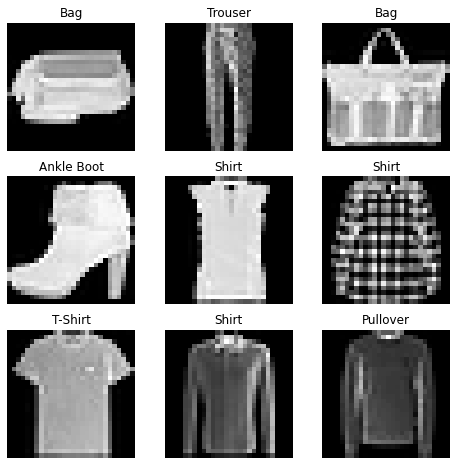

In [20]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Creando un Dataset Personalizado para tus archivos

- Una clase de Dataset personalizada debe implementar tres funciones: `__init__`, `__len__` y `__getitem__`. 
- En la siguiente implementación, las imágenes de FashionMNIST se almacenan en un directorio `img_dir`, y sus etiquetas se guardan por separado en un archivo CSV `annotations_file`.

In [21]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

Desglosemos qué ocurre en cada una de las funciones:

1. `__init__`

- Se ejecuta una vez cuando se instancia el objeto `Dataset`. 
- Inicializamos el directorio que contiene las imágenes, el archivo de labels y las transformaciones que pueden tener.

    El archivo `labels.csv` se ve así:

    >tshirt1.jpg, 0
    >
    >tshirt2.jpg, 0
    >
    >......
    >
    >ankleboot999.jpg, 9

In [22]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

2. `__len__`
- Devuelve la cantidad de muestras en nuestro conjunto de datos. Ejemplo:

In [23]:
def __len__(self):
    return len(self.img_labels)

3. `__getitem__`

- Carga y devuelve una muestra del dataset en el índice dado `idx`. 
- Basándose en el índice:
    1. Identifica la ubicación de la imagen en el disco
    2. La convierte en un tensor usando `read_image`
    3. Recupera la etiqueta correspondiente del archivo CSV en `self.img_labels`
    4. Aplica las funciones de transformación (si corresponde) 
    5. Devuelve la imagen en formato Tensor y la etiqueta correspondiente en una tupla.



### Preparando los datos para el entrenamiento con DataLoaders

- El Dataset recupera las features y labels de nuestro dataset de a una muestra. 
- Durante el entrenamiento de un modelo, generalmente queremos pasar muestras en “minibatches”, reshuffle los datos en cada época para reducir el overfitting del modelo, y usar multiprocesamiento en Python para acelerar la recuperación de datos.
- `DataLoader` es un iterable que abstrae esta complejidad y nos proporciona una API sencilla.

In [24]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterar a través del DataLoader

- Ya cargamos el dataset en el `DataLoader` y podemos iterar sobre el dataset según sea necesario. 
- Cada iteración a continuación devuelve un batch de `train_features` y `train_labels` (que contienen `batch_size=64` features y labels respectivamente). 
- Como especificamos `shuffle=True`, después de iterar sobre todos los lotes, los datos se mezclan. 
- Para un control más detallado sobre el orden de carga de los datos, ver [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


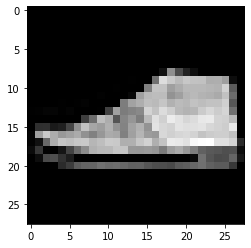

Label: 7


In [25]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

La dimensión del batch `torch.Size([64, 1, 28, 28])`, se puede desglosar de la siguiente manera:

- **64**: Es el tamaño del batch, lo que significa que en este caso estamos procesando 64 imágenes a la vez.
- **1**: Representa la cantidad de canales. En este caso, las imágenes son en escala de grises (1 canal). Si fueran a color, el valor sería 3 para los canales RGB.
- **28**: Es la altura de cada imagen.
- **28**: Es el ancho de cada imagen.

## Transformaciones

- Los datos no siempre vienen en su forma final procesada que se requiere para entrenar algoritmos de machine learning. 
- Usamos transformaciones para realizar algunas manipulaciones de los datos y hacerlos adecuados para el entrenamiento.
-Todos los datasets de TorchVision tienen dos parámetros: 
    - `transform` para modificar las características 
    - `target_transform` para modificar las etiquetas

- El módulo `torchvision.transforms` ofrece varias transformaciones comunes listas para usar.

- Las features de FashionMNIST están en formato de imagen PIL, y las etiquetas son números enteros. 
    - Para el entrenamiento, necesitamos que las __features sean tensores normalizados__ y las __etiquetas sean tensores codificados en one-hot__. 
    - Para realizar estas transformaciones, usamos `ToTensor` y `Lambda`.

In [26]:
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

Voy por aca: https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html